# **TD Probabilités - Statistiques**
1 Mars 2022 - David Loiseaux et Fanny Simões

## **Avant d'utiliser ce notebook**

- Travailler sur une copie de ce notebook dans votre drive.
- Le chargement de votre drive se fait de manière automatique, vous pouvez le retrouver dans les fichiers ci-contre. Sinon executer les commandes ci-dessous.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#**Exercice 1 : Statistiques descriptives**# 

In [ ]:
### Chargement des packages python
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### A) Importer la base de données


- **Télécharger le jeu de données ci-dessous dans votre drive au format csv**



https://trouver.datasud.fr/dataset/mesures-annuelles-des-polluants-principaux-en-region-sud

- **Chargement des données**

In [ ]:
# Importer les données avec pandas
datatmosud = pd.read_csv('/content/drive/MyDrive/TD_courscentrale/TD2_proba/mes_sudpaca_annuelle.csv', index_col=0)

# Afficher la base de données 
datatmosud.head()

,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,id_poll_ue,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93
FID,,,,,,,,,,,,,,,,,
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733e,BOUCHES-DU-RHONE,Marseille,13055,Marseille_Place Verneuil,FR00008,Urbain,Fond,NO2,8,32,microg/m3,annuelle,2019/01/01,2019/12/31,True,892193.231746,6.248403e+06
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733d,BOUCHES-DU-RHONE,Marseille,13055,Marseille_Place Verneuil,FR00008,Urbain,Fond,NO2,8,29,microg/m3,annuelle,2020/01/01,2020/12/31,True,892193.231746,6.248403e+06
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733c,BOUCHES-DU-RHONE,Marseille,13055,Marseille_Place Verneuil,FR00008,Urbain,Fond,NO2,8,31,microg/m3,annuelle,2021/01/01,2021/12/31,True,892193.231746,6.248403e+06
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733b,BOUCHES-DU-RHONE,Marseille,13055,Marseille_Place Verneuil,FR00008,Urbain,Fond,NOx as NO2,9,49,microg/m3,annuelle,2019/01/01,2019/12/31,True,892193.231746,6.248403e+06
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733a,BOUCHES-DU-RHONE,Marseille,13055,Marseille_Place Verneuil,FR00008,Urbain,Fond,NOx as NO2,9,43,microg/m3,annuelle,2020/01/01,2020/12/31,True,892193.231746,6.248403e+06


### B) Analyse de la base de données 

- **Information sur la base de données** 

In [ ]:
# Vérifier que la base de données est composée de 17 variables (numériques et catégorielles) et de 859 observations.
datatmosud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733e to mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-6fe4
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nom_dept      859 non-null    object 
 1   nom_com       859 non-null    object 
 2   insee_com     859 non-null    int64  
 3   nom_station   855 non-null    object 
 4   code_station  859 non-null    object 
 5   typologie     565 non-null    object 
 6   influence     624 non-null    object 
 7   nom_poll      859 non-null    object 
 8   id_poll_ue    859 non-null    int64  
 9   valeur        859 non-null    int64  
 10  unite         856 non-null    object 
 11  metrique      859 non-null    object 
 12  date_debut    859 non-null    object 
 13  date_fin      859 non-null    object 
 14  statut_valid  859 non-null    bool   
 15  x_l93         859 non-null    float64
 16  y_l93         859 non

- **Selection de variables**

In [ ]:
# Sélectionner : nom_dept/nom_poll/valeur
datatmosud2 = datatmosud[["nom_dept","nom_poll","valeur"]]
datatmosud2.head()

,nom_dept,nom_poll,valeur
FID,,,
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733e,BOUCHES-DU-RHONE,NO2,32
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733d,BOUCHES-DU-RHONE,NO2,29
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733c,BOUCHES-DU-RHONE,NO2,31
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733b,BOUCHES-DU-RHONE,NOx as NO2,49
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733a,BOUCHES-DU-RHONE,NOx as NO2,43


- **Quel est le niveau moyen de N02 dans les différents départements ? La variance et l'écart-type associés ?**

In [ ]:
# Filtrer la base de données selon NO2 
datatmosud3 = datatmosud2[(datatmosud2["nom_poll"] == "NO2")]

# Afficher les différentes modalités des variables "nom_dept", "nom_poll"
print(datatmosud3["nom_dept"].value_counts())
print(datatmosud3["nom_poll"].value_counts())

datatmosud3.head()

BOUCHES-DU-RHONE           75
ALPES-MARITIMES            35
VAR                        24
VAUCLUSE                   18
HAUTES-ALPES               12
ALPES-DE-HAUTE-PROVENCE     5
Name: nom_dept, dtype: int64
NO2    169
Name: nom_poll, dtype: int64


,nom_dept,nom_poll,valeur
FID,,,
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733e,BOUCHES-DU-RHONE,NO2,32
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733d,BOUCHES-DU-RHONE,NO2,29
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-733c,BOUCHES-DU-RHONE,NO2,31
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-7332,VAR,NO2,27
mes_sudpaca_annuelle.fid--6a74bd97_17f429acbc7_-7311,BOUCHES-DU-RHONE,NO2,18


In [ ]:
# Afficher le niveau moyen de NO2 par département + variance + écart-type
datatmosud3.groupby(['nom_dept']).agg([np.mean, np.var, np.std])

valeur                       
                              mean         var        std
nom_dept                                                 
ALPES-DE-HAUTE-PROVENCE   9.800000    2.200000   1.483240
ALPES-MARITIMES          25.457143   90.667227   9.521934
BOUCHES-DU-RHONE         26.213333  115.548468  10.749347
HAUTES-ALPES             22.833333   31.969697   5.654175
VAR                      21.958333  102.041667  10.101568
VAUCLUSE                 19.666667   32.000000   5.656854

- **Mise en forme d'un tableau de pollution** 

In [ ]:
# Calculer le niveau moyen de NO2, O3 et PM10 pour chaque département
polluantlist = ["NO2", "PM10", "O3"]
datatmosud4 = datatmosud2[datatmosud2["nom_poll"].isin(polluantlist)]
datatmosud4 = datatmosud4.groupby(['nom_dept','nom_poll']).mean()
print(datatmosud4)

                                     valeur
nom_dept                nom_poll           
ALPES-DE-HAUTE-PROVENCE NO2        9.800000
                        O3        73.181818
                        PM10      11.444444
ALPES-MARITIMES         NO2       25.457143
                        O3        61.769231
                        PM10      23.655172
BOUCHES-DU-RHONE        NO2       26.213333
                        O3        61.311475
                        PM10      22.731343
HAUTES-ALPES            NO2       22.833333
                        O3        51.500000
                        PM10      17.636364
VAR                     NO2       21.958333
                        O3        68.379310
                        PM10      20.560000
VAUCLUSE                NO2       19.666667
                        O3        59.611111
                        PM10      21.444444


In [ ]:
# Transformer la base de données telle que "nom_poll" corresponde aux noms des colonnes
datatmosud5 = datatmosud4.reset_index(level=['nom_poll'])
datatmosud5 = datatmosud5.pivot(columns="nom_poll",values="valeur")
print(datatmosud5)

nom_poll                       NO2         O3       PM10
nom_dept                                                
ALPES-DE-HAUTE-PROVENCE   9.800000  73.181818  11.444444
ALPES-MARITIMES          25.457143  61.769231  23.655172
BOUCHES-DU-RHONE         26.213333  61.311475  22.731343
HAUTES-ALPES             22.833333  51.500000  17.636364
VAR                      21.958333  68.379310  20.560000
VAUCLUSE                 19.666667  59.611111  21.444444


- **Mesure de la covariance**

In [ ]:
# Afficher la covariance entre NO2 et PM10
np.cov(datatmosud5['NO2'], datatmosud5['PM10'])

array([[35.70828278, 24.12013211],
       [24.12013211, 20.1879046 ]])

- **Matrice de correlation des polluants**

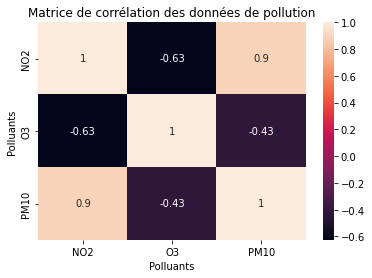

In [ ]:
# Visualiser la matrice de corrélation des polluants
corrMatrix = datatmosud5.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Matrice de corrélation des données de pollution")
plt.xlabel("Polluants")
plt.ylabel("Polluants")
plt.show()